<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="500" alt="cognitiveclass.ai logo">
</center>

# **Investigation of cryptocurrency exchange rate dynamic (on the example of BTC/USD), сalculation and analysis of technical financial indicators characterizing the cryptocurrency market (on the example of ATR, OBV, ADV, RSI, AD)**

​
## <i>Lab 1. Dataset creation</i>
​

# Introduction  Notebook

Estimated time needed: **30** minutes

<div class="alert alert-danger alertdanger">

# The tasks:
* Download and process statistical time series of cryptocurrency pair BTC/USD, describing the dynamics of the cryptocurrency market;
* Upload statistical data (framework) from the Pandas library;
* Calculate and analyze technical financial indicators for cryptocurrecny indicators analysis (AATR, OBV, ADV, RSI, AD)
    </div>

## Objectives

After completing this lab you will be able to:

*   Acquire data in various ways;
*   Obtain insights from data with Pandas library;
*   Calculate financial indicators.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li>Data Acquisition
        <li>Financial indicators
    <li>Basic Insight of Dataset</li>
</ol>

</div>
<hr>


## Data Acquisition
<p>
There are various formats for a dataset: .csv, .json, .xlsx  etc. The dataset can be stored in different places, on your local machine or sometimes online.<br>

In this section, you will learn how to load a dataset into our Jupyter Notebook.<br>

In our case, the Trading Dataset is an online source, and it is in a CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.

<ul>
    <li>Data source: <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0C0CEN/BTCBUSD_trades_1m.csv">https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0C0CEN/BTCBUSD_trades_1m.csv</a></li>
    <li>Data type: csv</li>
</ul>
The Pandas Library is a useful tool that enables us to read various datasets into a dataframe; our Jupyter notebook platforms have a built-in <b>Pandas Library</b> so that all we need to do is import Pandas without installing.
</p>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px  # for data visualization
from matplotlib import dates

import warnings
warnings.filterwarnings("ignore")

## Read Data
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the brackets, we put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.<br>

Because the data does not include headers, we can add an argument <code>headers = None</code> inside the <code>read_csv()</code> method so that pandas will not automatically set the first row as a header.<br>

You can also assign the dataset to any variable you create.

</p>


In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0C0CEN/BTCBUSD_trades_1m.csv"

In [3]:
# Read the online file by the URL provides above, and assign it to variable "df", use index_col = 0 to make first column as indexes, 
# low_memory = False not to get errors with data types 

df = pd.read_csv(path, index_col=0, low_memory=False)


Further specify the value of the precision parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [4]:
pd.options.display.float_format = '{:.2f}'.format

After reading the dataset, we can use the <code>dataframe.head(n)</code> method to check the top n rows of the dataframe, where n is an integer. Contrary to <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> will show you the bottom n rows of the dataframe.


In [5]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1: </h1>
<b>Check the bottom 10 rows of data frame "df".</b>
</div>


In [6]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
print("The last 10 rows of the dataframe\n")
df.tail(10)
```


### Add Headers</h3>
<p>
Take a look at our dataset. Pandas automatically set the header with an integer starting from 0.
</p>
<p>
To better describe our data, we can introduce a header. This information is available at: 
    <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0C0CEN/BTCBUSD_trades_1m.csv" target="_blank">https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0C0CEN/BTCBUSD_trades_1m.csv</a>.
</p>
<p>
Thus, we have to add headers manually.
</p>
<p>
First, we create a list "headers" that include all column names in order.
Then, we use <code>dataframe.columns = headers</code> to replace the headers with the list we created.
</p>




In [7]:
# create headers list
headers = ["Time","Open","High","Low","Close","Volume","Rec_count","Avg_price"]
print("headers\n", headers)

headers
 ['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Rec_count', 'Avg_price']


In [8]:
df.columns = headers
df.head(10)

,Time,Open,High,Low,Close,Volume,Rec_count,Avg_price
0,2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81
1,2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84
2,2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64
3,2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50
4,2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09
5,2022-11-11 14:43:00,16498.30,16548.80,16491.90,16499.80,219.36,96,16519.31
6,2022-11-11 14:44:00,16502.30,16542.00,16502.30,16540.80,233.96,101,16526.21
7,2022-11-11 14:45:00,16540.70,16746.00,16540.50,16742.70,1183.99,112,16639.43
8,2022-11-11 14:46:00,16747.60,16829.40,16686.90,16829.40,1356.19,113,16760.05
9,2022-11-11 14:47:00,16829.80,17285.20,16828.30,17212.90,2122.80,116,17060.89


Now, we have successfully read the raw dataset and added the correct headers into the dataframe.


We replace headers and recheck our dataframe:


In [9]:
# set time as index:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index("Time")
df

,Open,High,Low,Close,Volume,Rec_count,Avg_price
Time,,,,,,,
2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81
2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84
2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64
2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50
2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09
...,...,...,...,...,...,...,...
2022-12-29 23:55:00,16626.70,16626.70,16626.70,16626.70,2.35,9,16626.70
2022-12-29 23:56:00,16626.70,16626.80,16626.70,16626.80,0.71,15,16626.78
2022-12-29 23:57:00,16626.70,16626.80,16626.70,16626.80,2.61,8,16626.76


## Financial indicators 


### ATR


The average true range (ATR) is a technical analysis indicator introduced by market technician J. Welles Wilder Jr. in his book New Concepts in Technical Trading Systems that measures market volatility by decomposing the entire range of an asset price for that period.

The true range indicator is taken as the greatest of the following: current high less the current low; the absolute value of the current high less the previous close; and the absolute value of the current low less the previous close. The ATR is then a moving average, generally using 14 days, of the true ranges.

Traders can use shorter periods than 14 days to generate more trading signals, while longer periods have a higher probability to generate fewer trading signals.


**Formula**


The formula to calculate ATR for an investment with a previous ATR calculation is :


<annotation encoding="application/x-tex">\begin{aligned}\frac{ \text{Previous ATR} ( n - 1 ) + \text{TR} }{ n } \\\\\textbf{where:} \\n = \text{Number of periods} \\\text{TR} = \text{True range} \\\end{aligned}</annotation></semantics>


If there is not a previous ATR calculated, you must use:


$$
TR = max[(H \ - \ L ), | H \ - \ C_t| , | \ L \ - \ C_t |] 
$$
<br>
$$
ATR = \frac{1}{n} \ \sum\limits _{i=1} ^{n} \ TR_i
$$
<br>
$$
 - TR_i: A particular True Range
$$
$$
 - n: The time period employed
$$
$$
 - H: Current High
$$
$$
 - L: Current Low
$$
$$
 - C_p: Previous Close
$$


Let's calculate our financial indicator without python packages.


In [10]:
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
#set 15 to make ATR from 15 min because our dataset is updating every min
df['ATR'] = true_range.rolling(15).sum()/15

Let's visualize the ATR and the stock price:


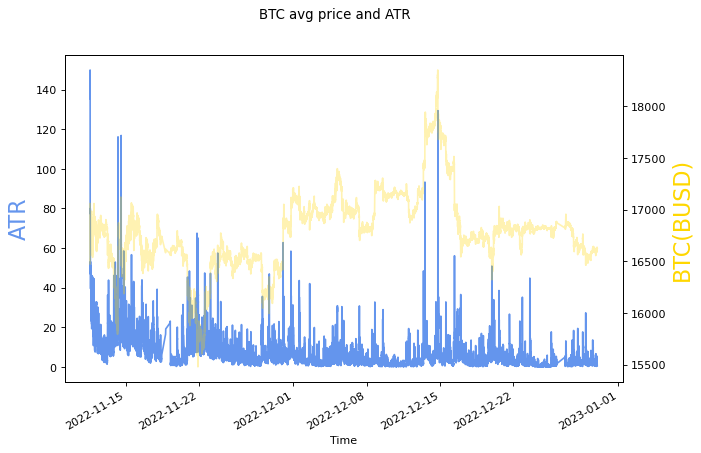

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (9,6), dpi = 80)
ax2 = ax.twinx()
line1 = df['ATR'].plot(ax=ax, label = 'ATR' , color = 'cornflowerblue')
line2 = df['Avg_price'].plot(ax=ax2, secondary_y=True, alpha=0.3, label = 'BTC', color = 'gold')
line1.set_xlabel('Time')
line1.set_ylabel('ATR', color='cornflowerblue', fontsize = 20)
line2.set_ylabel('BTC(BUSD)', color='gold', fontsize = 20)
plt.suptitle('BTC avg price and ATR') 
plt.show()

### OBV


On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. Joseph Granville first developed the OBV metric in the 1963 book Granville's New Key to Stock Market Profits.


Granville believed that volume was the key force behind markets and designed OBV to project when major moves in the markets would occur based on volume changes. In his book, he described the predictions generated by OBV as "a spring being wound tightly." He believed that when volume increases sharply without a significant change in the stock's price, the price will eventually jump upward or fall downward.


**Formula**
$$OBV=OBV_{prev} + \begin{equation}
\left\{ 
  \begin{aligned}
    volume, \ \ if  \ close > close_{prev}\\\\
    0, \ \ if  \ close = close_{prev}\\
    -volume, \ \ if  \ close < close_{prev}\\
  \end{aligned}
  \right.
\end{equation}
$$


Let's make a function which will add OBV column:


In [12]:
def add_obv(df):
    res = (np.sign(df["Close"].diff()) * df["Volume"]).fillna(0).cumsum()
    return res

Use our function:


In [13]:
df["OBV"] = add_obv(df)

Let's visualize the OBV and the stock price:


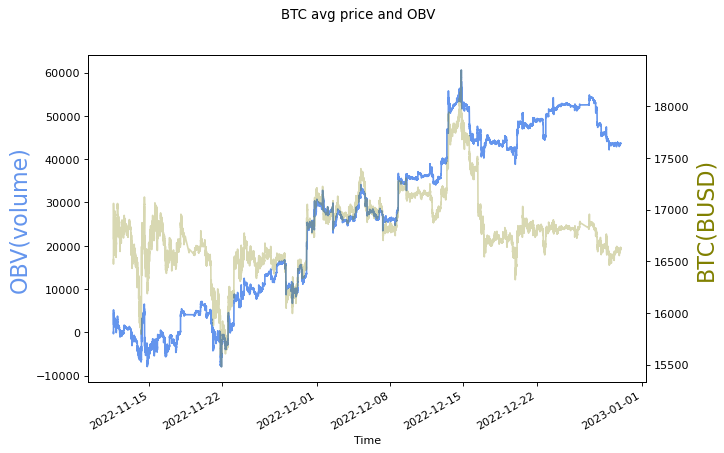

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (9,6), dpi = 80)
ax2 = ax.twinx()
line1 = df['OBV'].plot(ax=ax, label = 'OBV' , color = 'cornflowerblue')
line2 = df['Avg_price'].plot(ax=ax2, secondary_y=True, alpha=0.3, label = 'BTC', color = 'olive')
line1.set_xlabel('Time')
line1.set_ylabel('OBV(volume)', color='cornflowerblue', fontsize = 20)
line2.set_ylabel('BTC(BUSD)', color='olive', fontsize = 20)
plt.suptitle('BTC avg price and OBV') 
plt.show()

On-balance volume has a positive value when the price today is higher than the previous closing price, while a negative value appears if today's price is lower than the last closing price.


Let's also look at last 500 trades:


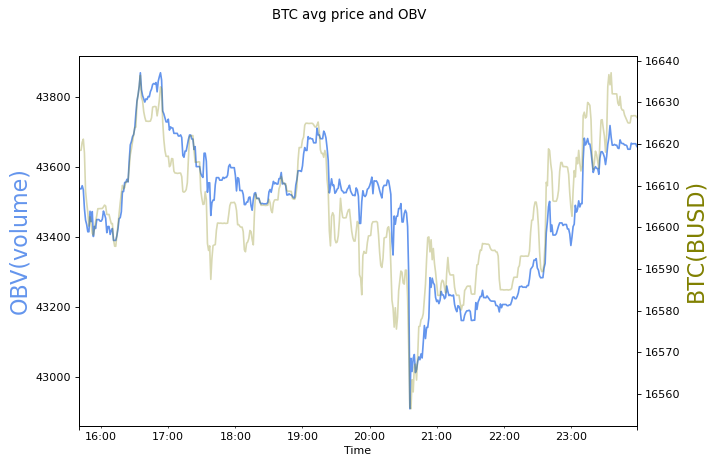

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (9,6), dpi = 80)
ax2 = ax.twinx()
line1 = df['OBV'][-500:].plot(ax=ax, label = 'OBV' , color = 'cornflowerblue')
line2 = df['Avg_price'][-500:].plot(ax=ax2, secondary_y=True, alpha=0.3, label = 'BTC', color = 'olive')
line1.set_xlabel('Time')
line1.set_ylabel('OBV(volume)', color='cornflowerblue', fontsize = 20)
line2.set_ylabel('BTC(BUSD)', color='olive', fontsize = 20)
plt.suptitle('BTC avg price and OBV') 
plt.show()

As we can see, the number of volume coincides with price jumps.


### Relative Strength Index (RSI)
The Relative Strength Index is a commonly used Oscillator Indicator. For Mean Reversion Traders, it can generate signals to determine whether price is overbought or when price is oversold. 

RSI can also be used to determine the strength of a move/trend (as the name implies).

**In this example, we will calculate the Average True Range with the Period of 15.**


**Formula**


First step:

$$
RSI_{step \ one} = 100 - [ \frac{100}{1 + \frac{Avg \ gain}{Avg \ loss}} ]
$$


Second step:

$$
RSI_{step \ two} = 100 - [ \frac{100}{1 + \frac{Previous \ avg \ gain * 14 + Current \ gain}{Previous \ avg \ loss * 14 + Current \ loss}} ]
$$


,RSI_14,RS,Ema_gain,Ema_loss
Time,,,,
2022-11-11 14:38:00,NaN,NaN,NaN,NaN
2022-11-11 14:39:00,NaN,NaN,NaN,NaN
2022-11-11 14:40:00,NaN,NaN,NaN,NaN
2022-11-11 14:41:00,NaN,NaN,NaN,NaN
2022-11-11 14:42:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-29 23:55:00,48.34,0.94,0.44,0.47
2022-12-29 23:56:00,49.14,0.97,0.40,0.41
2022-12-29 23:57:00,50.02,1.00,0.36,0.36


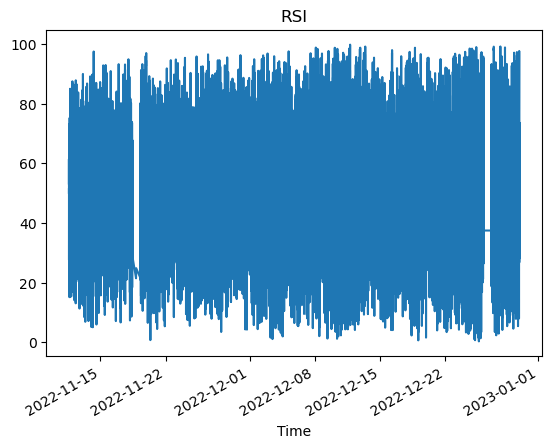

In [16]:
# setting the RSI Period
rsi_period = 15

# to calculate RSI, we first need to calculate the exponential weighted aveage gain and loss during the period
df['Gain'] = (df['Close'] - df['Open']).apply(lambda x: x if x > 0 else 0)
df['Loss'] = (df['Close'] - df['Open']).apply(lambda x: -x if x < 0 else 0)

# here we use the same formula to calculate Exponential Moving Average
# ewm - Provide exponentially weighted (EW) calculations.
df['Ema_gain'] = df['Gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
df['Ema_loss'] = df['Loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

# the Relative Strength is the ratio between the exponential avg gain divided by the exponential avg loss
df['RS'] = df['Ema_gain'] / df['Ema_loss']

# the RSI is calculated based on the Relative Strength using the following formula
df['RSI_14'] = 100 - (100 / (df['RS'] + 1))

# displaying the results
display(df[['RSI_14', 'RS', 'Ema_gain', 'Ema_loss']])

fig, ax = plt.subplots()
df['RSI_14'].plot(ax=ax)
plt.title('RSI')
plt.show()

### ADTV


Average daily trading volume (ADTV) is the average number of shares traded within a day in a given stock. Daily volume is how many shares are traded each day, but this can be averaged over a number of days to find the average daily volume. Average daily trading volume is an important metric because high or low trading volume attracts different types of traders and investors. Many traders and investors prefer higher average daily trading volume compared to low trading volume, because with high volume it is easier to get into and out positions. Low volume assets have fewer buyers and sellers, and therefore it may be harder to enter or exit at a desired price.


**Formula**
$$
ADTV_t = \frac{ volume \ daily_t }{count \ of \  trades_t }
$$


In [17]:
# make copy od main df so as not to damage it
test = df.copy()

Resample our data:


In [18]:
task = pd.DataFrame()
task['Volume'] = test['Volume'].resample('1d').sum()
task['Count'] = test['Open'].resample('1d').count()
task.tail()

,Volume,Count
Time,,
2022-12-25,20879.43,1440
2022-12-26,6090.26,302
2022-12-27,44362.07,1440
2022-12-28,51577.89,1440
2022-12-29,28657.21,1440


Let's make a new dataframe for merging:


In [19]:
# calculate the ADTV
task['ADTV'] = task['Volume'] / task['Count']
# make a columm for merge
df['Time'] = df.index
df['Time'] = pd.to_datetime(df['Time'])
task['Time'] = task.index
task['Time'] = pd.to_datetime(task['Time'])
task['join'] = pd.to_datetime(task['Time']).dt.date
df['join'] = pd.to_datetime(df['Time']).dt.date
# drop unnecessary columns
task.drop(columns='Volume', inplace=True)
task.drop(columns='Count', inplace=True)
task.drop(columns='Time', inplace=True)

Let's merge our dataframes:


In [20]:
df = df.merge(task, on='join',how = 'outer', sort=True)
df.drop(columns='join', inplace=True)
# reset time as index:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index("Time")
df[559:565]

,Open,High,Low,Close,Volume,Rec_count,Avg_price,ATR,OBV,Gain,Loss,Ema_gain,Ema_loss,RS,RSI_14,ADTV
Time,,,,,,,,,,,,,,,,
2022-11-11 23:57:00,16997.20,17025.00,16976.30,17018.50,277.07,82,16993.54,40.30,3194.62,21.30,0.00,16.00,9.24,1.73,63.39,140.69
2022-11-11 23:58:00,17018.60,17024.80,16981.00,17015.60,136.46,80,16995.56,41.87,3058.16,0.00,3.00,14.00,8.46,1.65,62.33,140.69
2022-11-11 23:59:00,17016.00,17016.00,16993.30,17007.90,91.49,73,17005.15,41.87,2966.68,0.00,8.10,12.25,8.42,1.46,59.27,140.69
2022-11-12 00:00:00,17015.90,17040.30,16998.40,16998.40,155.08,82,17026.30,43.88,2811.59,0.00,17.50,10.72,9.55,1.12,52.88,39.45
2022-11-12 00:01:00,16998.50,17023.30,16990.00,17023.00,91.94,89,17009.40,43.15,2903.54,24.50,0.00,12.44,8.36,1.49,59.82,39.45
2022-11-12 00:02:00,17026.60,17065.00,17026.60,17048.60,141.59,89,17053.65,43.95,3045.12,22.00,0.00,13.64,7.31,1.86,65.09,39.45


Let's visualize the ADTV and the stock price:


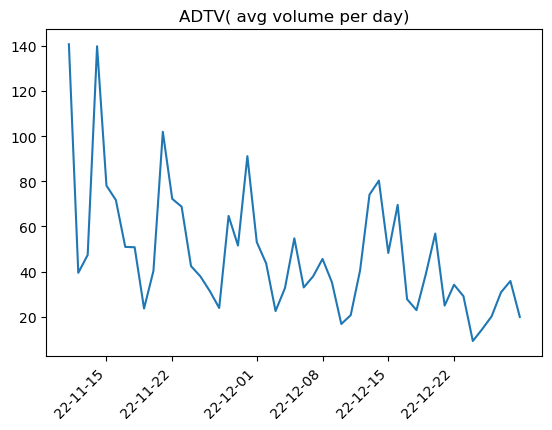

In [21]:

fig, ax = plt.subplots()
ax.plot(task['ADTV'])

ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))
fig.autofmt_xdate(rotation=45)
plt.title('ADTV( avg volume per day)')
plt.show()

### AD 


The accumulation/distribution line was created by Marc Chaikin to determine the flow of money into or out of a security.

 It should not be confused with the advance/decline line. While their initials might be the same, these are entirely different indicators, as are their users. The advance/decline line provides insight into market movements and the accumulation/distribution line is of use to traders seeking to measure buy/sell pressure on a security or confirm the strength of a trend.  


<i>$The\ Chaikin\ advance/decline\ (AD)$</i> or <i>$accumulation/distribution\ (AD)\ line$</i> is a volume-based indicator to measure the cumulative flow of money into and out of an asset. The indicator assumes that the degree of buying or selling pressure can be determined by the location of the close, relative to the high and low for the period.

$The\ A/D\ line$ is a running total of each period's <b>$ money\ flow\ volume\  (MFV)$ </b>. It is calculated as follows: 

**Formula**

1. Compute the <b>$ money\ flow\ index\  MFI_t$ </b> as the relationship of the close to the high-low range:
$$
MFI_t = \frac{|\ Close_t \ - Low_t \ | - |\ High_t \ - Close_t \ |}{High_t \ - Low_t \ }
$$
2. Multiply the $MFI_t$ by the period's volume  $Volume_t$ to come up with the $MFV$:
$$
MFT_t =  MFI_t\times Volume_t 
$$
3. Obtain the $AD_t\ line$:
$$
AD_t = AD_{t-1} + MFV_t
$$


1. Calculate the MFI:


In [22]:
df['MFI'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close']))/(df['High'] - df['Low'])

2. Calculate thr MFV:


In [23]:
df['MFV'] = df['MFI'] * df['Volume']

3. Calculate the AD:


In [24]:
df['ADL'] =df['MFV'].cumsum()
df.head()

,Open,High,Low,Close,Volume,Rec_count,Avg_price,ATR,OBV,Gain,Loss,Ema_gain,Ema_loss,RS,RSI_14,ADTV,MFI,MFV,ADL
Time,,,,,,,,,,,,,,,,,,,
2022-11-11 14:38:00,16540.10,16540.10,16486.50,16486.50,304.95,97,16516.81,NaN,0.00,0.00,53.60,NaN,NaN,NaN,NaN,140.69,-1.00,-304.95,-304.95
2022-11-11 14:39:00,16489.30,16493.30,16456.20,16462.10,319.26,103,16473.84,NaN,-319.26,0.00,27.20,NaN,NaN,NaN,NaN,140.69,-0.68,-217.72,-522.67
2022-11-11 14:40:00,16465.50,16496.00,16447.40,16492.90,290.90,99,16478.64,NaN,-28.36,27.40,0.00,NaN,NaN,NaN,NaN,140.69,0.87,253.79,-268.88
2022-11-11 14:41:00,16492.90,16547.10,16472.50,16543.00,314.05,99,16516.50,NaN,285.69,50.10,0.00,NaN,NaN,NaN,NaN,140.69,0.89,279.53,10.65
2022-11-11 14:42:00,16540.20,16547.10,16498.20,16498.30,226.95,99,16527.09,NaN,58.74,0.00,41.90,NaN,NaN,NaN,NaN,140.69,-1.00,-226.02,-215.37


Let's visualize the ADL and the stock price:


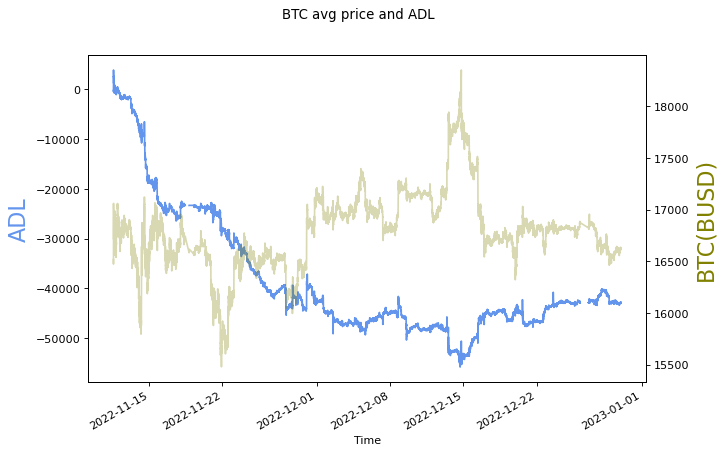

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (9,6), dpi = 80)
ax2 = ax.twinx()
line1 = df['ADL'].plot(ax=ax, label = 'ADL' , color = 'cornflowerblue')
line2 = df['Avg_price'].plot(ax=ax2, secondary_y=True, alpha=0.3, label = 'BTC', color = 'olive')
line1.set_xlabel('Time')
line1.set_ylabel('ADL', color='cornflowerblue', fontsize = 20)
line2.set_ylabel('BTC(BUSD)', color='olive', fontsize = 20)
plt.suptitle('BTC avg price and ADL') 
plt.show()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>Vizualize the MFV.</b>
</div>


In [26]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
fig, ax = plt.subplots(1, 1, figsize = (9,6), dpi = 80)
ax2 = ax.twinx()
line1 = df['MFV'].plot(ax=ax, label = 'MFV' , color = 'cornflowerblue')
line1.set_xlabel('Time')
line1.set_ylabel('MFV', color='cornflowerblue', fontsize = 20)
plt.suptitle('MFV') 
plt.show()
```

</details>


## Save Dataset
<p>
Correspondingly, Pandas enables us to save the dataset to csv. By using the <code>dataframe.to_csv()</code> method, you can add the file path and name along with quotation marks in the brackets.
</p>
<p>
For example, if you would save the dataframe <b>df</b> as <b>BTCBUSD.csv</b> to your local machine, you may use the syntax below, where <code>index = True</code> means the row names will be written.
</p>


In [27]:
df.to_csv("BTCBUSD.csv", index=True)

We can also read and save other file formats. We can use similar functions like **`pd.read_csv()`** and **`df.to_csv()`** for other data formats. The functions are listed in the following table:


## Read/Save Other Data Formats

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


# Basic Insight of Dataset
<p>
After reading data into Pandas dataframe, it is time for us to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.

</p>


## Data Types
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

</p>


In [28]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Rec_count      int64
Avg_price    float64
ATR          float64
OBV          float64
Gain         float64
Loss         float64
Ema_gain     float64
Ema_loss     float64
RS           float64
RSI_14       float64
ADTV         float64
MFI          float64
MFV          float64
ADL          float64
dtype: object

A series with the data type of each column is returned.


<p>
    As shown above, it is clear to see that the data type of "time" is <b>object</b>, "rec_count" - <b>int64</b>, etc.
</p>
<p>
These data types can be changed; we will learn how to accomplish this in a later module.
</p>


## Describe
If we would like to get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:


```python
dataframe.describe()
```


This method will provide various summary statistics, excluding <code>NaN</code> (Not a Number) values.


In [29]:
df.describe()

,Open,High,Low,Close,Volume,Rec_count,Avg_price,ATR,OBV,Gain,Loss,Ema_gain,Ema_loss,RS,RSI_14,ADTV,MFI,MFV,ADL
count,67291.00,67291.00,67291.00,67291.00,67291.00,67291.00,67291.00,67277.00,67291.00,67291.00,67291.00,67277.00,67277.00,67277.00,67277.00,67291.00,67179.00,67179.00,67179.00
mean,16793.17,16796.67,16789.78,16793.17,47.14,42.27,16793.26,6.98,26581.32,2.34,2.34,2.34,2.34,1.59,50.25,47.14,-0.01,-0.64,-38490.49
std,370.66,369.95,371.38,370.67,107.36,21.76,370.62,8.34,19233.12,6.27,6.06,2.62,2.60,4.69,17.88,26.41,0.89,78.15,12513.25
min,15478.50,15511.60,15443.50,15475.10,0.01,1.00,15479.29,0.08,-7954.00,0.00,0.00,0.00,0.00,0.00,0.25,9.24,-1.00,-3986.89,-55699.30
25%,16574.80,16578.80,16571.50,16574.90,9.29,25.00,16574.85,2.05,8685.77,0.00,0.00,0.81,0.79,0.62,38.09,29.10,-1.00,-17.87,-46524.68
50%,16803.30,16806.30,16800.40,16803.30,22.63,38.00,16803.21,4.33,27907.41,0.00,0.00,1.64,1.63,1.01,50.32,40.28,-0.01,-0.19,-43099.46
75%,16968.00,16970.90,16965.40,16968.00,48.15,58.00,16968.07,8.88,44187.48,2.50,2.50,2.98,3.02,1.66,62.40,56.85,1.00,17.22,-32888.42
max,18344.60,18370.00,18324.20,18344.70,3986.89,124.00,18352.16,149.90,60569.84,383.10,241.40,59.54,60.69,573.96,99.83,140.69,1.00,2826.14,3799.12


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.<br>

For example, the attribute "open" has 67291 counts, the mean value of this column is 16793.167007, the standard deviation is 370.661830, the minimum value is 15478.5, 25th percentile is 16574.8, 50th percentile is 16803.3, 75th percentile is 16968, and the maximum value is 18344.6. <br>

However, what if we would also like to check all the columns including those that are of type object? <br><br>

You can add an argument <code>include = "all"</code> inside the bracket. Let's try it again.

</p>


In [30]:
# describe all the columns in "df", use datetime_is_numeric=True to make datetime64 == numeric
df.describe(include = "all",datetime_is_numeric=True)

,Open,High,Low,Close,Volume,Rec_count,Avg_price,ATR,OBV,Gain,Loss,Ema_gain,Ema_loss,RS,RSI_14,ADTV,MFI,MFV,ADL
count,67291.00,67291.00,67291.00,67291.00,67291.00,67291.00,67291.00,67277.00,67291.00,67291.00,67291.00,67277.00,67277.00,67277.00,67277.00,67291.00,67179.00,67179.00,67179.00
mean,16793.17,16796.67,16789.78,16793.17,47.14,42.27,16793.26,6.98,26581.32,2.34,2.34,2.34,2.34,1.59,50.25,47.14,-0.01,-0.64,-38490.49
std,370.66,369.95,371.38,370.67,107.36,21.76,370.62,8.34,19233.12,6.27,6.06,2.62,2.60,4.69,17.88,26.41,0.89,78.15,12513.25
min,15478.50,15511.60,15443.50,15475.10,0.01,1.00,15479.29,0.08,-7954.00,0.00,0.00,0.00,0.00,0.00,0.25,9.24,-1.00,-3986.89,-55699.30
25%,16574.80,16578.80,16571.50,16574.90,9.29,25.00,16574.85,2.05,8685.77,0.00,0.00,0.81,0.79,0.62,38.09,29.10,-1.00,-17.87,-46524.68
50%,16803.30,16806.30,16800.40,16803.30,22.63,38.00,16803.21,4.33,27907.41,0.00,0.00,1.64,1.63,1.01,50.32,40.28,-0.01,-0.19,-43099.46
75%,16968.00,16970.90,16965.40,16968.00,48.15,58.00,16968.07,8.88,44187.48,2.50,2.50,2.98,3.02,1.66,62.40,56.85,1.00,17.22,-32888.42
max,18344.60,18370.00,18324.20,18344.70,3986.89,124.00,18352.16,149.90,60569.84,383.10,241.40,59.54,60.69,573.96,99.83,140.69,1.00,2826.14,3799.12


<p>
Now it provides the statistical summary of all the columns, including object-typed attributes.<br>

We can now see how many unique values there, which one is the top value and the frequency of top value in the object-typed columns.<br>

Some values in the table above show as "NaN". This is because those numbers are not available regarding a particular column type.<br>

</p>


Also we can describe only one column:


In [31]:
df[['ADL']].describe(datetime_is_numeric=True)

,ADL
count,67179.00
mean,-38490.49
std,12513.25
min,-55699.30
25%,-46524.68
50%,-43099.46
75%,-32888.42
max,3799.12


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<p>
You can select the columns of a dataframe by indicating the name of each column. For example, you can select the three columns as follows:
</p>
<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3']]</code>
</p>
<p>
Where "column" is the name of the column, you can apply the method  ".describe()" to get the statistics of those columns as follows:
</p>
<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3'] ].describe()</code>
</p>

Apply the  method to ".describe()" to the columns 'Open' and 'Avg_price'.

</div>


In [32]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df[['Open', 'Avg_price']].describe()
```

</details>


## Info
Another method you can use to check your dataset is:


```python
dataframe.info()
```


It provides a concise summary of your DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [33]:
# look at the info of "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67291 entries, 2022-11-11 14:38:00 to 2022-12-29 23:59:00
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       67291 non-null  float64
 1   High       67291 non-null  float64
 2   Low        67291 non-null  float64
 3   Close      67291 non-null  float64
 4   Volume     67291 non-null  float64
 5   Rec_count  67291 non-null  int64  
 6   Avg_price  67291 non-null  float64
 7   ATR        67277 non-null  float64
 8   OBV        67291 non-null  float64
 9   Gain       67291 non-null  float64
 10  Loss       67291 non-null  float64
 11  Ema_gain   67277 non-null  float64
 12  Ema_loss   67277 non-null  float64
 13  RS         67277 non-null  float64
 14  RSI_14     67277 non-null  float64
 15  ADTV       67291 non-null  float64
 16  MFI        67179 non-null  float64
 17  MFV        67179 non-null  float64
 18  ADL        67179 non-null  float64
dtypes: float64(

# Excellent! You have just completed the  Introduction Notebook!


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>

<a href="https://www.linkedin.com/in/bohdan-tsisinskyi-539913255/ " target="_blank" >Bohdan Tsisinskyi</a>

<a href="https://author.skills.network/instructors/yaroslav_vyklyuk_2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0C0CEN2305-2023-01-01">Prof. Yaroslav Vyklyuk, DrSc, PhD</a>

<a href="https://author.skills.network/instructors/mariya_fleychuk?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0C0CEN2305-2023-01-01">Prof. Mariya Fleychuk, DrSc, PhD</a>.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
|2023-02-25|1.0|Bohdan Tsisnskyi|Lab created|


<hr>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
